In [1]:
import lane_detection
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img = cv2.imread("lanes.png")

lines = lane_detection.detect_lines(img, 35, 60, 3, 200, 20)
lines = lane_detection.rmvExcessLines(lines)
img = lane_detection.draw_lines(img, lines, (0, 255, 0))
plt.imshow(img)

In [ ]:
lanes = lane_detection.detect_lanes(lines)
print(lanes)

In [ ]:
img = lane_detection.draw_lanes(img, lanes)
plt.imshow(img)

In [2]:
i = 0
cap = cv2.VideoCapture('AUV_Vid.mkv')

while True:
    ret, frame = cap.read()
    if i % 25 == 0:
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        lines = lane_detection.detect_lines(frame, 35, 60, 3, 200, 20)
        lines = lane_detection.rmvExcessLines(lines)
        lanes = lane_detection.detect_lanes(lines)
        img = lane_detection.draw_lanes(frame, lanes)
        plt.imshow(img)
        plt.show()
    if i == 300:
        break
    i += 1

TypeError: slice indices must be integers or None or have an __index__ method

In [3]:
img = cv2.imread('AUV_Stream_Photo.png')
img = img[int(img.shape[0]/2):int(img.shape[0])]


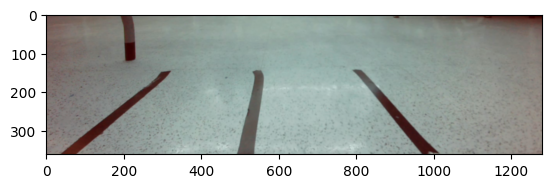

In [4]:
blur = cv2.GaussianBlur(img,(5,5),0)
plt.imshow(blur)

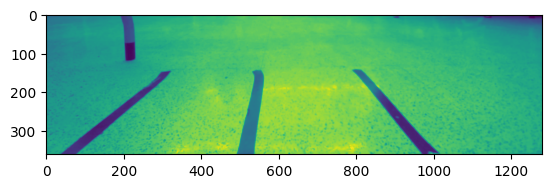

In [5]:
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

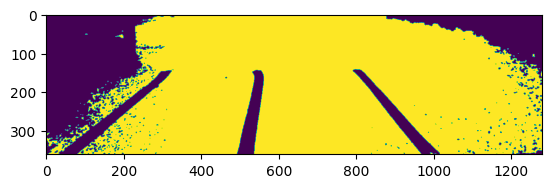

In [12]:
thresh, bw = cv2.threshold(gray, 128, 255, cv2.THRESH_OTSU)
plt.imshow(bw)